# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    df = pd.read_csv("C:/Users/dimil/OneDrive/Desktop/real_estate_data.csv",sep='\t')
except:
    df = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

По отдельным столбцам наблюдается значительное количество пропусков. Уже видно наличие значений-выбросов практически во всех столбцах. 

## Предобработка данных

Заменим значения отсутствующих значений на 0 для столбца, содержащего информацию о числе балконов.

In [5]:
df['balcony'].fillna(0,inplace=True)

Аналогично можно заполнить нулем значения в столбцах про количество парков и прудов в радиусе 3 км, так как их, скорее всего, нет.

In [6]:
df['parks_around3000'].fillna(0,inplace=True)
df['ponds_around3000'].fillna(0,inplace=True)

Не во всех столбцах удастся заменить пропущенные данные. Так, сложно предположить высоту потолка в пропущенных ячейках. То же самое можно сказать о жилой площади и площади кухни. Также невозможно заполнить названия отсутствующих населенных пунктов. Отсутствие информации о расстоянии до ближайшего аэропорта/центра города/парка/пруда может быть связано с крайней удаленностью от подобных объектов или невозможностью построить маршрут по картографическим данным. Отсутствие данных по длительности размещения объекта может означать, что сделка с объект до сих пор не была проведена.

Считаю необходимым изменить тип столбца is_apartment, так как по смыслу ему гораздо больше подходит тип bool. Также можно заменить тип float64 на float32 для экономии памяти: 

In [7]:
df['is_apartment'] = df['is_apartment'].astype('bool')

In [8]:
df['last_price'] = df['last_price'].astype('float32')
df['total_area'] = df['total_area'].astype('float32')
df['floors_total'] = df['floors_total'].astype('float32')

Проверим наш датасет на наличие дубликатов:

In [9]:
df.duplicated().sum()

0

Проверим столбец с данными по населенным пунктам на наличие скрытых дубликатов:

In [10]:
display(df['locality_name'].unique())

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Похоже, необходимо избавиться от дублирования, возникающего из-за различия в написании слова поселок.

In [11]:
df['locality_name'] = df['locality_name'].str.replace('посёлок', 'поселок')

In [12]:
display(df['locality_name'].unique())

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

Наконец, посмотрим на внесенные изменения в целом

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float32
total_area              23699 non-null float32
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float32
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

## Расчёты и добавление результатов в таблицу

Сначала рассчитаем цену за кв. м.

In [14]:
df['price_per_m'] = df['last_price']/df['total_area']
display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m
0,20,13000000.0,108.000000,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,True,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.367188
1,7,3350000.0,40.400002,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,True,...,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.789062
2,10,5196000.0,56.000000,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,True,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.710938
3,0,64900000.0,159.000000,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,True,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.093750
4,2,10000000.0,100.000000,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,True,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000
5,10,2890000.0,30.400000,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,True,...,0.0,городской поселок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,95065.789062
6,6,3700000.0,37.299999,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,True,...,1.0,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710938
7,5,7915000.0,71.599998,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,True,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.695312
8,20,2900000.0,33.160000,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,True,...,0.0,поселок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0,87454.765625
9,18,5400000.0,61.000000,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,True,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.593750


Добавим столбцы про год, месяц и день размещения публикации:

In [15]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['year'] = df['first_day_exposition'].dt.year
df['month'] = df['first_day_exposition'].dt.month
df['weekday'] = df['first_day_exposition'].dt.weekday
display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,year,month,weekday
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16.0,51.00,8,True,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.367188,2019,3,3
1,7,3350000.0,40.400002,2018-12-04,1,NaN,11.0,18.60,1,True,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.789062,2018,12,1
2,10,5196000.0,56.000000,2015-08-20,2,NaN,5.0,34.30,4,True,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.710938,2015,8,3
3,0,64900000.0,159.000000,2015-07-24,3,NaN,14.0,NaN,9,True,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.093750,2015,7,4
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14.0,32.00,13,True,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,2018,6,1
5,10,2890000.0,30.400000,2018-09-10,1,NaN,12.0,14.40,5,True,...,NaN,0.0,NaN,0.0,NaN,55.0,95065.789062,2018,9,0
6,6,3700000.0,37.299999,2017-11-02,1,NaN,26.0,10.60,6,True,...,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710938,2017,11,3
7,5,7915000.0,71.599998,2019-04-18,2,NaN,24.0,NaN,22,True,...,11634.0,0.0,NaN,0.0,NaN,NaN,110544.695312,2019,4,3
8,20,2900000.0,33.160000,2018-05-23,1,NaN,27.0,15.43,26,True,...,NaN,0.0,NaN,0.0,NaN,189.0,87454.765625,2018,5,2
9,18,5400000.0,61.000000,2017-02-26,3,2.50,9.0,43.60,7,True,...,15008.0,0.0,NaN,0.0,NaN,289.0,88524.593750,2017,2,6


Добавим этаж квартиры:

In [16]:
def which_floor(row):
    if row['floor'] == 1 :
        return 'первый'
    if row['floor']== row['floors_total']:
        return 'последний'
    return 'другой'    
    
df['floor_category'] = df.apply(lambda row: which_floor(row), axis=1)
display(df.head())   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,year,month,weekday,floor_category
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16.0,51.0,8,True,...,1.0,482.0,2.0,755.0,NaN,120370.367188,2019,3,3,другой
1,7,3350000.0,40.400002,2018-12-04,1,NaN,11.0,18.6,1,True,...,0.0,NaN,0.0,NaN,81.0,82920.789062,2018,12,1,первый
2,10,5196000.0,56.000000,2015-08-20,2,NaN,5.0,34.3,4,True,...,1.0,90.0,2.0,574.0,558.0,92785.710938,2015,8,3,другой
3,0,64900000.0,159.000000,2015-07-24,3,NaN,14.0,NaN,9,True,...,2.0,84.0,3.0,234.0,424.0,408176.093750,2015,7,4,другой
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14.0,32.0,13,True,...,2.0,112.0,1.0,48.0,121.0,100000.000000,2018,6,1,другой


Расcчитаем соотношение жилой и общей площади, а также отношение площади кухни к общей:

In [17]:
df['living_to_total'] = df['living_area']/df['total_area']
df['kitchen_to_total'] = df['kitchen_area']/df['total_area']
display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_m,year,month,weekday,floor_category,living_to_total,kitchen_to_total
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16.0,51.00,8,True,...,2.0,755.0,NaN,120370.367188,2019,3,3,другой,0.472222,0.231481
1,7,3350000.0,40.400002,2018-12-04,1,NaN,11.0,18.60,1,True,...,0.0,NaN,81.0,82920.789062,2018,12,1,первый,0.460396,0.272277
2,10,5196000.0,56.000000,2015-08-20,2,NaN,5.0,34.30,4,True,...,2.0,574.0,558.0,92785.710938,2015,8,3,другой,0.612500,0.148214
3,0,64900000.0,159.000000,2015-07-24,3,NaN,14.0,NaN,9,True,...,3.0,234.0,424.0,408176.093750,2015,7,4,другой,NaN,NaN
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14.0,32.00,13,True,...,1.0,48.0,121.0,100000.000000,2018,6,1,другой,0.320000,0.410000
5,10,2890000.0,30.400000,2018-09-10,1,NaN,12.0,14.40,5,True,...,0.0,NaN,55.0,95065.789062,2018,9,0,другой,0.473684,0.299342
6,6,3700000.0,37.299999,2017-11-02,1,NaN,26.0,10.60,6,True,...,0.0,NaN,155.0,99195.710938,2017,11,3,другой,0.284182,0.386059
7,5,7915000.0,71.599998,2019-04-18,2,NaN,24.0,NaN,22,True,...,0.0,NaN,NaN,110544.695312,2019,4,3,другой,NaN,0.263966
8,20,2900000.0,33.160000,2018-05-23,1,NaN,27.0,15.43,26,True,...,0.0,NaN,189.0,87454.765625,2018,5,2,другой,0.465320,0.265682
9,18,5400000.0,61.000000,2017-02-26,3,2.50,9.0,43.60,7,True,...,0.0,NaN,289.0,88524.593750,2017,2,6,другой,0.714754,0.106557


## Исследовательский анализ данных

Построим гистограммы для следующих параметров: площадь, цена, число комнат, высота потолков:

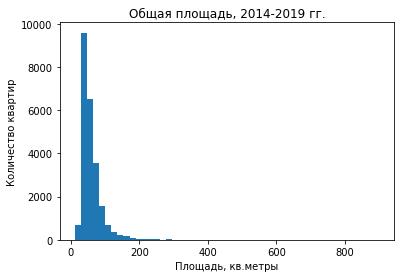

In [18]:
plt.hist(df['total_area'], bins=50)
plt.ylabel('Количество квартир')
plt.xlabel('Площадь, кв.метры')
plt.title("Общая площадь, 2014-2019 гг.")
plt.show();

Подавляющее большинство объектов обладают площадью в пределах 300 кв. м. При этом есть и объекты площадью порядка 800 кв. м. 

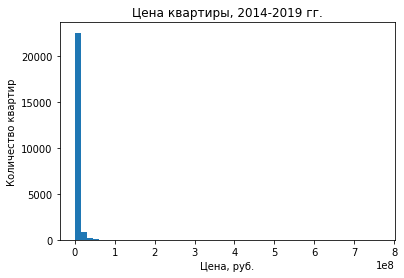

In [19]:
plt.hist(df['last_price'], bins=50)
plt.ylabel('Количество квартир')
plt.xlabel('Цена, руб.')
plt.title("Цена квартиры, 2014-2019 гг.")
plt.show();

Гистограмма по ценам также указывает на существование аномально дорогих объектов.

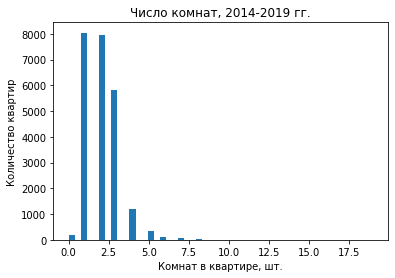

In [20]:
plt.hist(df['rooms'], bins=50)
plt.ylabel('Количество квартир')
plt.xlabel('Комнат в квартире, шт.')
plt.title("Число комнат, 2014-2019 гг.")
plt.show();

Большинство объектов недвижимости в базе имеют от 1 до 8 комнат. Существование объктов с 19 комнатами вызывает много вопросов.

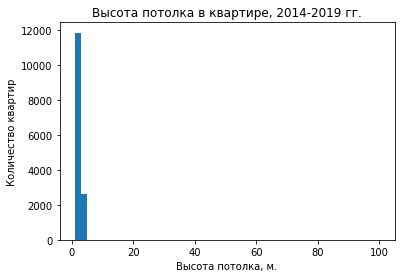

In [21]:
plt.hist(df['ceiling_height'], bins=50)
plt.ylabel('Количество квартир')
plt.xlabel('Высота потолка, м.')
plt.title("Высота потолка в квартире, 2014-2019 гг.")
plt.show();

Высота потолков около 100 метров - тоже серьезный повод задуматься.

Изучим время продажи квартиры. Сначала построим гистограмму:

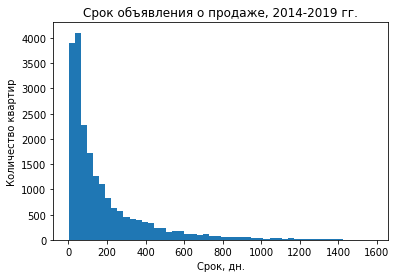

In [22]:
plt.hist(df['days_exposition'], bins=50)
plt.ylabel('Количество квартир')
plt.xlabel('Срок, дн.')
plt.title("Срок объявления о продаже, 2014-2019 гг.")
plt.show();

Судя по всему, значительное количество сделок было заключено за период менее 100 дней. Для продажи некоторых квартир потребовалось несколько лет. Посмотрим на среднее и медиану:

In [23]:
display(df['days_exposition'].mean())

180.88863436982163

In [24]:
display(df['days_exposition'].median())

95.0

Помимо этого, можно обратить внимание на квартили распределения данных из таблицы, полученной методом .describe. Соответственно, быстрыми можно назвать сделки, заключенные в пределах 1,5 месяцев, а долгими - те, что были закрыты в период от 8 месяцев и более.

Теперь избавимся от редких или выбивающихся значений. Начнем со столбца про время продажи квартиры:

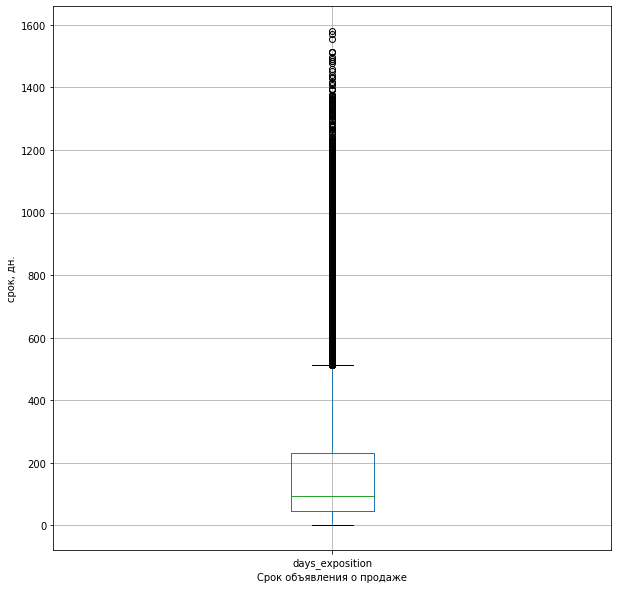

In [25]:
bplot = df.boxplot(column = 'days_exposition',figsize=(10,10))
bplot.set_ylabel('срок, дн.')
bplot.set_xlabel('Срок объявления о продаже')
plt.show()

In [26]:
df.drop(df[df['days_exposition'] > 500].index, inplace=True)

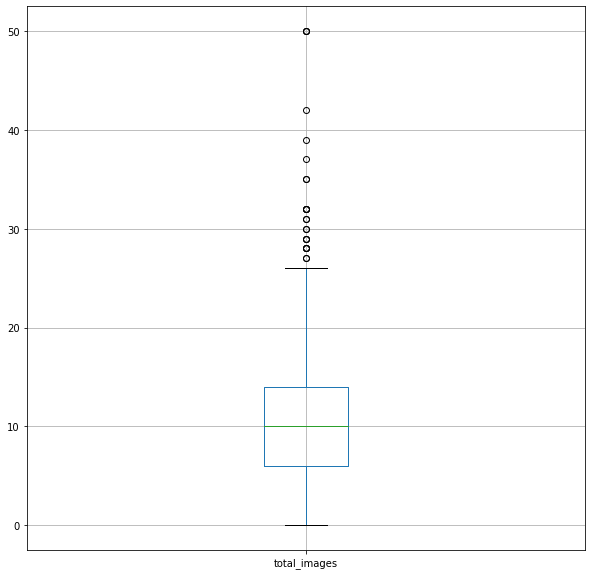

In [27]:
df.boxplot('total_images',figsize=(10,10))

In [28]:
df.drop(df[df['total_images'] > 25].index, inplace=True)

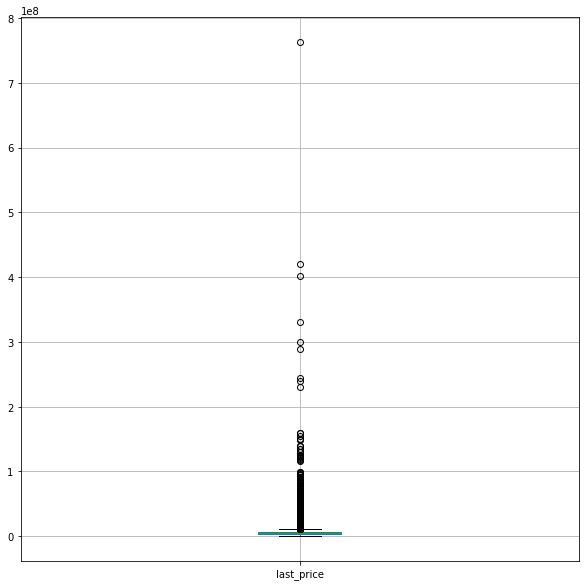

In [29]:
df.boxplot('last_price',figsize=(10,10))

In [30]:
df.drop(df[df['last_price'] > 10000000].index, inplace=True)

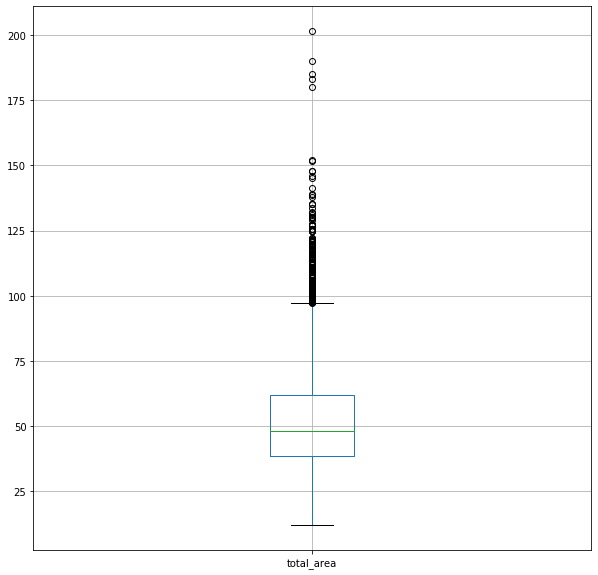

In [31]:
df.boxplot('total_area',figsize=(10,10))

In [32]:
df.drop(df[df['total_area'] > 90].index, inplace=True)

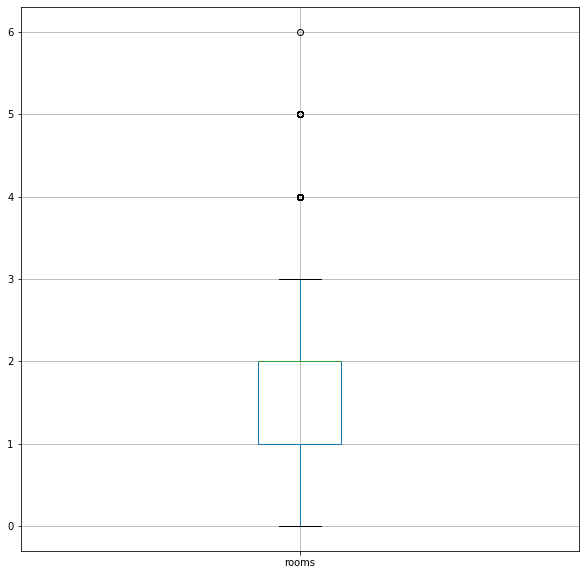

In [33]:
df.boxplot('rooms',figsize=(10,10))

In [34]:
df.drop(df[df['rooms'] > 3].index, inplace=True)


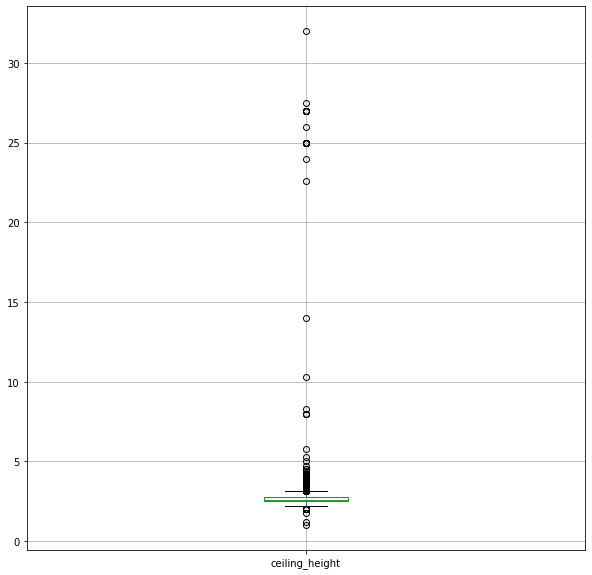

In [35]:
df.boxplot('ceiling_height',figsize=(10,10))

In [36]:
df.drop(df[df['ceiling_height'] > 3].index, inplace=True)

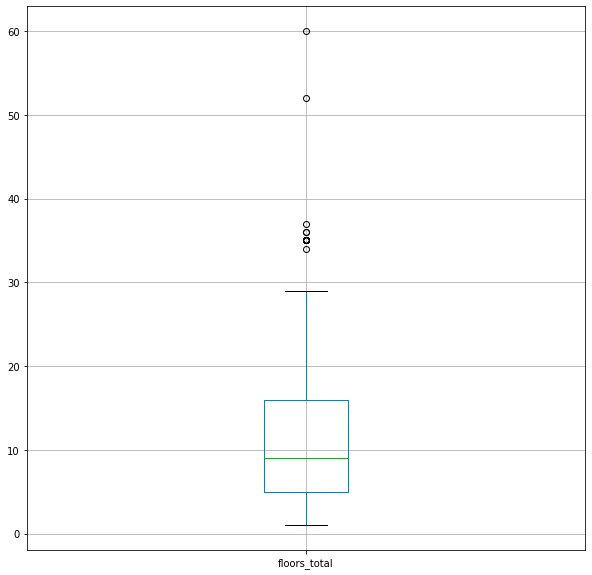

In [37]:
df.boxplot('floors_total',figsize=(10,10))

In [38]:
df.drop(df[df['floors_total'] > 30].index, inplace=True)

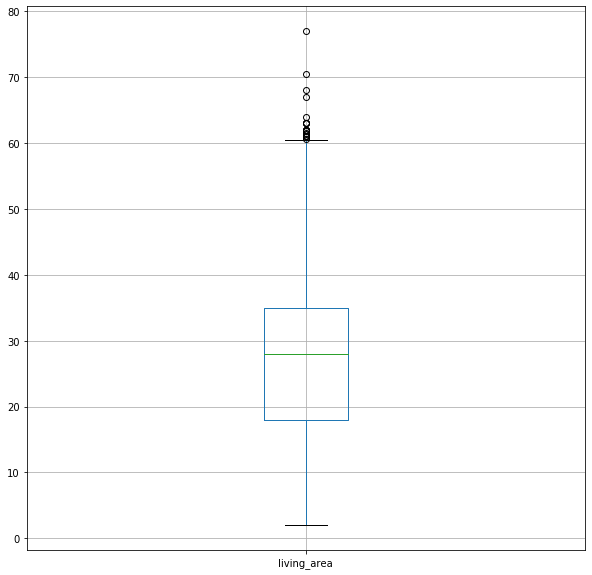

In [39]:
df.boxplot('living_area',figsize=(10,10))

In [40]:
df.drop(df[df['living_area'] > 60].index, inplace=True)

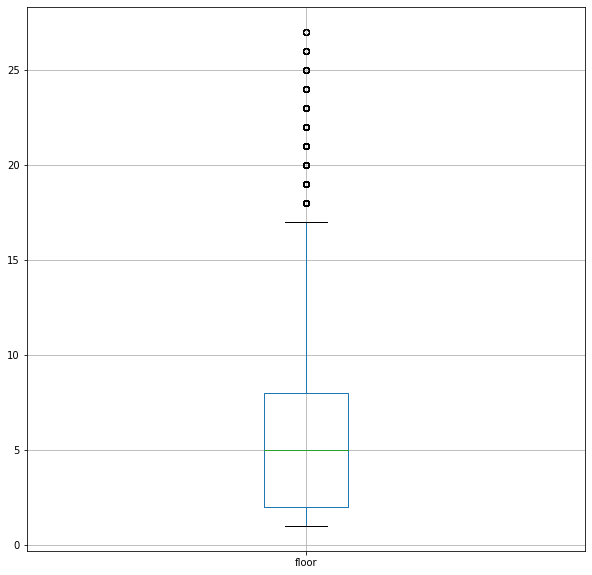

In [41]:
df.boxplot('floor',figsize=(10,10))

In [42]:
df.drop(df[df['floor'] > 17].index, inplace=True)

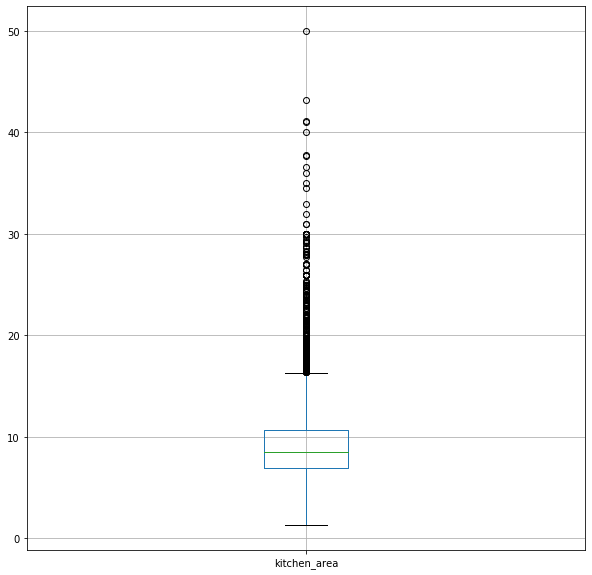

In [43]:
df.boxplot('kitchen_area',figsize=(10,10))

In [44]:
df.drop(df[df['kitchen_area'] > 16].index, inplace=True)

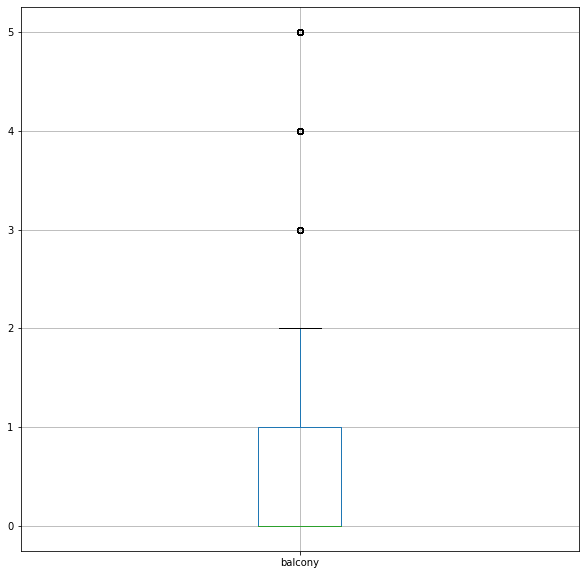

In [45]:
df.boxplot('balcony',figsize=(10,10))

In [46]:
df.drop(df[df['balcony'] > 2].index, inplace=True)

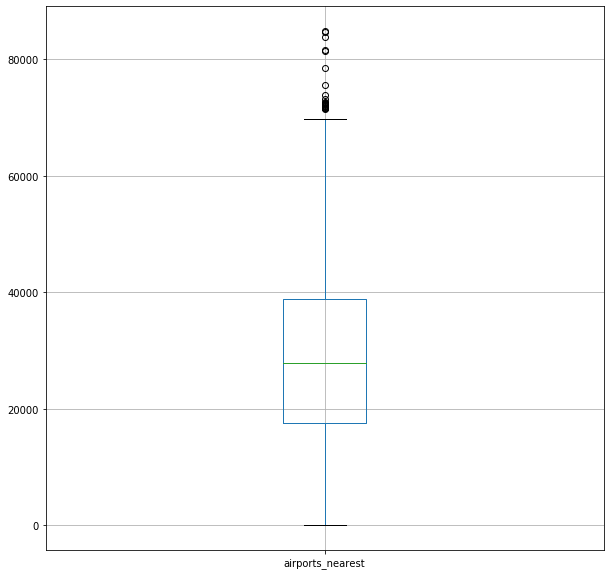

In [47]:
df.boxplot('airports_nearest',figsize=(10,10))

In [48]:
df.drop(df[df['airports_nearest'] > 70000].index, inplace=True)

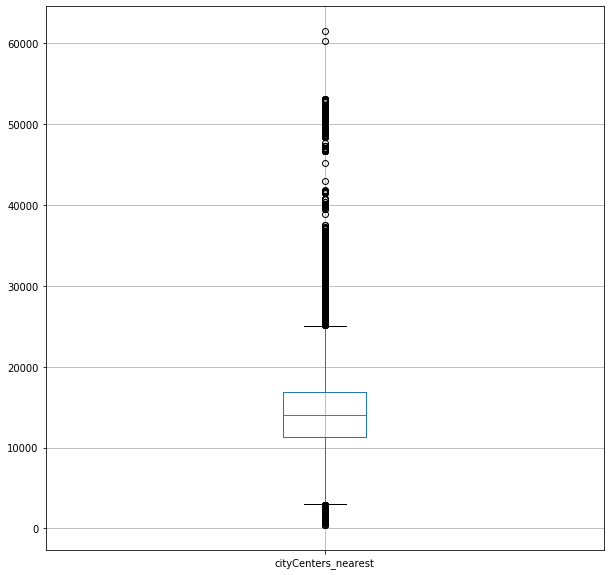

In [49]:
df.boxplot('cityCenters_nearest',figsize=(10,10))

In [50]:
df.drop(df[(df['cityCenters_nearest'] > 25000)&(df['cityCenters_nearest'] < 4000)].index, inplace=True)

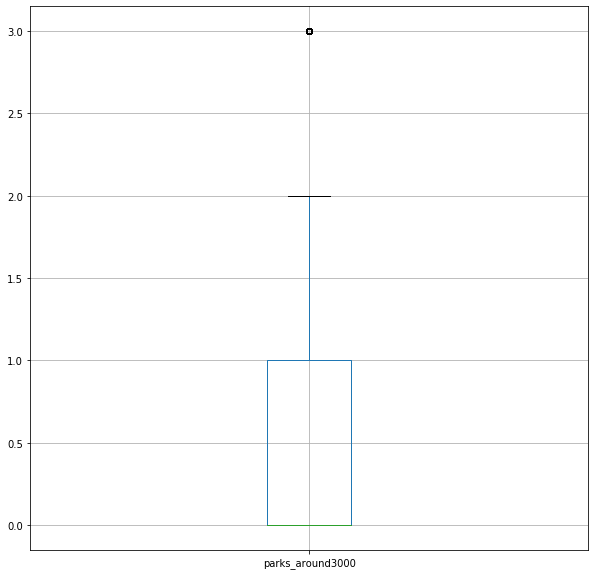

In [51]:
df.boxplot('parks_around3000',figsize=(10,10))

In [52]:
df.drop(df[df['parks_around3000'] > 2].index, inplace=True)

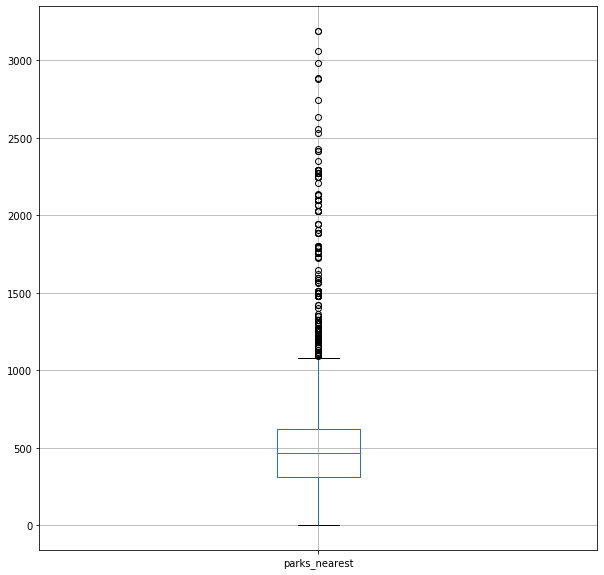

In [53]:
df.boxplot('parks_nearest',figsize=(10,10))

In [54]:
df.drop(df[df['parks_nearest'] > 1050].index, inplace=True)

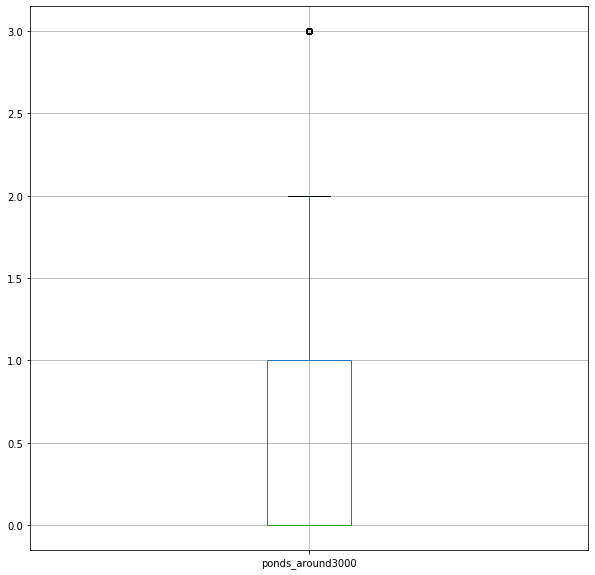

In [55]:
df.boxplot('ponds_around3000',figsize=(10,10))

In [56]:
df.drop(df[df['ponds_around3000'] > 2].index, inplace=True)

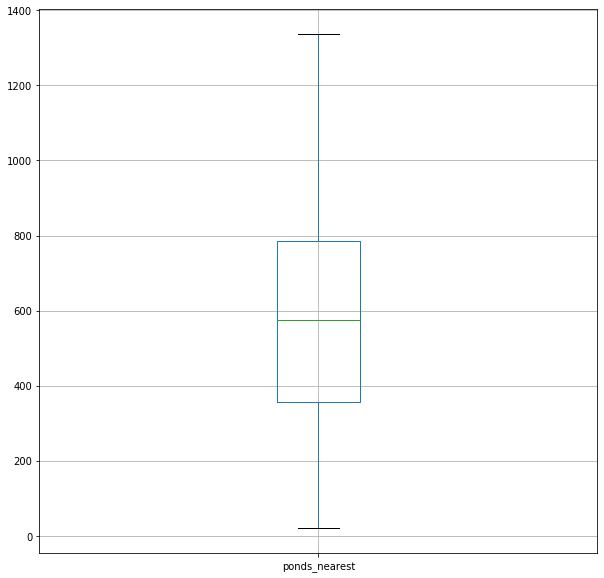

In [57]:
df.boxplot('ponds_nearest',figsize=(10,10))

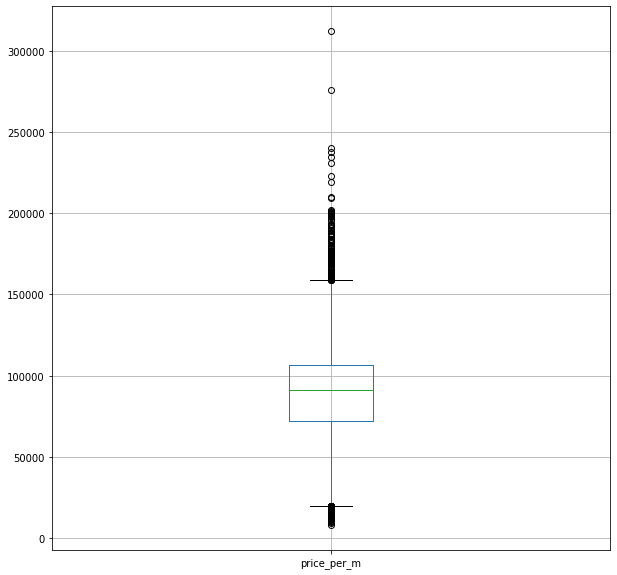

In [58]:
df.boxplot('price_per_m',figsize=(10,10))

In [59]:
df.drop(df[df['price_per_m'] > 155000].index, inplace=True)
df.drop(df[df['price_per_m'] < 25000].index, inplace=True)

Итак, значительное количество выбросов наблюдалось в столбцах, содержащих значения о времени продажи, площади, ценах, а также расстоянии до центра и парка. Менее всего выбросов наблюдалось у количества фотографий, комнат, этажей, балконов, что выглядит логичным. 

Изучим факторы, влияющие на стоимость квартиры больше всего. Построим диаграммы рассеяния:

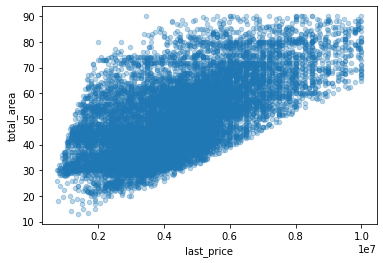

In [60]:
df.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3)

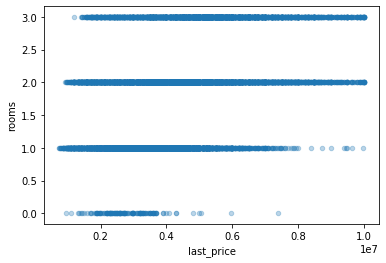

In [61]:
df.plot(x='last_price', y='rooms', kind='scatter', alpha=0.3)

In [63]:
# df.plot(x='last_price', y='floor_category', kind='scatter', alpha=0.3)

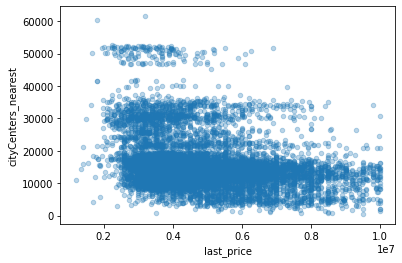

In [64]:
df.plot(x='last_price', y='cityCenters_nearest', kind='scatter', alpha=0.3)

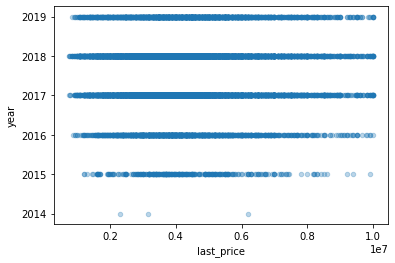

In [65]:
df.plot(x='last_price', y='year', kind='scatter', alpha=0.3)

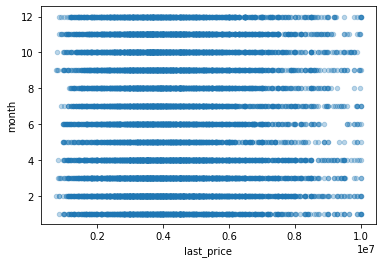

In [66]:
df.plot(x='last_price', y='month', kind='scatter', alpha=0.3)

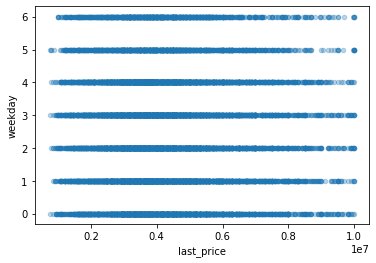

In [67]:
df.plot(x='last_price', y='weekday', kind='scatter', alpha=0.3)

In [68]:
data_1 = df[['total_images','last_price','total_area','ceiling_height','floors_total','living_area','kitchen_area','airports_nearest','cityCenters_nearest','parks_nearest','ponds_nearest','price_per_m','days_exposition']]
data_2 = df[['last_price','is_apartment','studio','open_plan','year','month','weekday','rooms','floor','balcony']]
data_1.corr()

,total_images,last_price,total_area,ceiling_height,floors_total,living_area,kitchen_area,airports_nearest,cityCenters_nearest,parks_nearest,ponds_nearest,price_per_m,days_exposition
total_images,1.000000,0.173649,0.104895,0.000776,0.008658,0.089215,0.040043,0.002851,-0.037664,-0.002069,-0.012635,0.125774,0.006594
last_price,0.173649,1.000000,0.652435,0.310354,0.290643,0.534830,0.411516,0.009704,-0.285275,0.024477,0.010531,0.633888,-0.000661
total_area,0.104895,0.652435,1.000000,0.189996,-0.008777,0.906087,0.351649,0.017143,-0.036633,0.023437,0.008462,-0.135132,0.068934
ceiling_height,0.000776,0.310354,0.189996,1.000000,0.234824,0.058564,0.417753,-0.053020,-0.157522,-0.049119,-0.015849,0.217679,0.016930
floors_total,0.008658,0.290643,-0.008777,0.234824,1.000000,-0.173425,0.482329,0.098160,-0.091866,0.044169,0.004155,0.416363,-0.041167
living_area,0.089215,0.534830,0.906087,0.058564,-0.173425,1.000000,0.045286,-0.014755,-0.044785,0.025044,0.016095,-0.206112,0.060942
kitchen_area,0.040043,0.411516,0.351649,0.417753,0.482329,0.045286,1.000000,0.036096,-0.029450,-0.001192,-0.030593,0.196577,0.022942
airports_nearest,0.002851,0.009704,0.017143,-0.053020,0.098160,-0.014755,0.036096,1.000000,0.185622,-0.115430,0.027876,-0.017216,0.002797
cityCenters_nearest,-0.037664,-0.285275,-0.036633,-0.157522,-0.091866,-0.044785,-0.029450,0.185622,1.000000,-0.048924,-0.043229,-0.410311,0.028213
parks_nearest,-0.002069,0.024477,0.023437,-0.049119,0.044169,0.025044,-0.001192,-0.115430,-0.048924,1.000000,0.137895,0.005032,0.025060


In [69]:
data_2.corr(method = "spearman")

,last_price,is_apartment,studio,open_plan,year,month,weekday,rooms,floor,balcony
last_price,1.000000,-0.008136,-0.085699,-0.060408,0.055721,-0.008017,-0.006835,0.442002,0.219565,0.058646
is_apartment,-0.008136,1.000000,-0.002975,0.001305,0.218465,0.108039,0.008276,-0.012073,0.002199,-0.196183
studio,-0.085699,-0.002975,1.000000,-0.005049,0.003424,0.003391,-0.002627,-0.155933,0.039376,0.043945
open_plan,-0.060408,0.001305,-0.005049,1.000000,-0.036127,0.032548,0.013542,-0.095353,0.020993,0.051737
year,0.055721,0.218465,0.003424,-0.036127,1.000000,-0.311400,-0.012579,-0.007855,0.004083,-0.032333
month,-0.008017,0.108039,0.003391,0.032548,-0.311400,1.000000,0.006029,-0.015299,0.023958,0.021880
weekday,-0.006835,0.008276,-0.002627,0.013542,-0.012579,0.006029,1.000000,0.001114,-0.001384,-0.001972
rooms,0.442002,-0.012073,-0.155933,-0.095353,-0.007855,-0.015299,0.001114,1.000000,-0.139320,-0.031601
floor,0.219565,0.002199,0.039376,0.020993,0.004083,0.023958,-0.001384,-0.139320,1.000000,0.177195
balcony,0.058646,-0.196183,0.043945,0.051737,-0.032333,0.021880,-0.001972,-0.031601,0.177195,1.000000


Цена квартиры, как и ожидалось, в существенной степени коррелирует с общей площадью, количеством комнат, высотой потолка и расстоянием до центра. При этом, есть значительное количество квартир с большой площадью, но невысокой ценой. Количество квартир на первом и последнем этажах также снижается после определенного уровня цены. По годам был заметен рост количества дорогих квартир (что может быть связано с общим ростом цен на недвижимость), при этом в 2019 году их количество упало. По месяцам заметно ниже количество объявлений о продаже дорогих квартир летом и в декабре. Аналогичное снижение видно и с наступлением выходных дней недели.

Выделим населённые пункты с самой высокой и низкой стоимостью жилья:

In [70]:
top = list(df['locality_name'].value_counts().head(10).index)



In [71]:
top_locality = df.query('locality_name == @top')
display(top_locality)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_m,year,month,weekday,floor_category,living_to_total,kitchen_to_total
1,7,3350000.0,40.400002,2018-12-04,1,NaN,11.0,18.6,1,True,...,0.0,NaN,81.0,82920.789062,2018,12,1,первый,0.460396,0.272277
6,6,3700000.0,37.299999,2017-11-02,1,NaN,26.0,10.6,6,True,...,0.0,NaN,155.0,99195.710938,2017,11,3,другой,0.284182,0.386059
9,18,5400000.0,61.000000,2017-02-26,3,2.50,9.0,43.6,7,True,...,0.0,NaN,289.0,88524.593750,2017,2,6,другой,0.714754,0.106557
10,5,5050000.0,39.599998,2017-11-16,1,2.67,12.0,20.3,3,True,...,2.0,553.0,137.0,127525.257812,2017,11,3,другой,0.512626,0.214646
14,1,4400000.0,36.000000,2016-06-23,1,NaN,6.0,17.0,1,True,...,1.0,96.0,203.0,122222.218750,2016,6,3,первый,0.472222,0.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23682,11,2350000.0,35.599998,2016-06-23,1,2.50,5.0,17.0,4,False,...,0.0,NaN,40.0,66011.242188,2016,6,3,другой,0.477528,0.233146
23686,8,3300000.0,31.000000,2017-04-29,1,2.55,9.0,18.0,6,True,...,1.0,317.0,193.0,106451.609375,2017,4,5,другой,0.580645,0.209677
23687,6,3200000.0,39.000000,2017-12-16,1,NaN,9.0,20.0,6,True,...,0.0,NaN,38.0,82051.281250,2017,12,5,другой,0.512821,0.282051
23689,13,3550000.0,35.299999,2018-02-28,1,2.86,15.0,16.3,4,True,...,2.0,652.0,29.0,100566.578125,2018,2,2,другой,0.461756,0.257790


Теперь посчитаем цену среднюю цену квадратного метра в данных пунктах:

In [72]:
top_locality.pivot_table(index='locality_name',values='last_price',aggfunc={'last_price': 'mean', 'locality_name': 'count'}).sort_values(by='last_price',ascending=False)

,last_price,locality_name
locality_name,,
Санкт-Петербург,4988823.00,9206
Пушкин,4814916.00,232
поселок Парголово,4428955.50,203
деревня Кудрово,4073561.25,204
поселок Шушары,3971450.25,351
Колпино,3571641.50,230
поселок Мурино,3524528.00,414
Всеволожск,3496852.50,315
Гатчина,3331485.50,252


В среднем, самые дешевые квартиры находятся в Выборге, а самые дорогие - в Петербурге, что выглядит вполне логично.

Теперь определим, какие области входят в центр Санкт-Петербурга. Сначала создадим столбец с расстоянием до центра в километрах и округлим полученные значения. 

In [73]:
df['cityCenters_nearest_km']=(df['cityCenters_nearest']/1000).round(0)

,mean
,last_price
cityCenters_nearest_km,
29.0,3650000.00
28.0,4257000.00
27.0,2250000.00
26.0,3834093.25
25.0,3914935.50
24.0,3629294.00
23.0,4387058.00
22.0,4829880.00


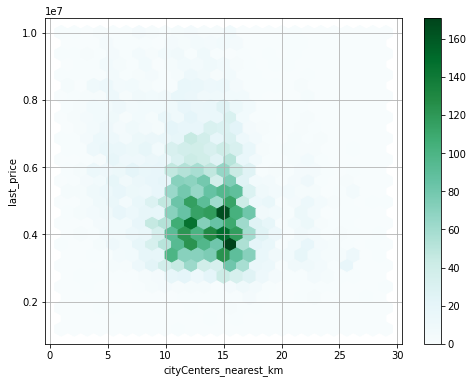

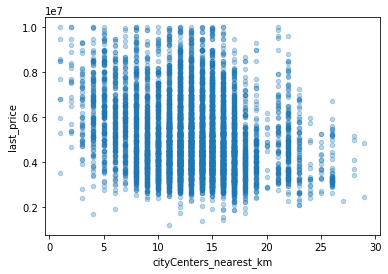

In [74]:
display(df[df['locality_name']=="Санкт-Петербург"].pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc=['mean']).sort_values(by=['cityCenters_nearest_km'], ascending=False))
df[df['locality_name']=="Санкт-Петербург"].plot(x='cityCenters_nearest_km', y='last_price', kind='hexbin', gridsize=25, figsize=(8, 6), sharex=False, grid=True)
df[df['locality_name']=="Санкт-Петербург"].plot(x='cityCenters_nearest_km', y='last_price', kind='scatter', alpha=0.3)

Из графиков и сводной таблицы можно сделать вывод, что граница проходит по 16 км включительно.

Наконец, исследуем сегмент квартир в центре Санкт-Петербурга. Сначала построим гистограммы для лучшего понимания распределения значений: 

In [75]:
O="Санкт-Петербург"
df=df.query('(locality_name == @O)&(cityCenters_nearest_km<17)')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_m,year,month,weekday,floor_category,living_to_total,kitchen_to_total,cityCenters_nearest_km
9,18,5400000.0,61.000000,2017-02-26,3,2.50,9.0,43.6,7,True,...,NaN,289.0,88524.593750,2017,2,6,другой,0.714754,0.106557,15.0
10,5,5050000.0,39.599998,2017-11-16,1,2.67,12.0,20.3,3,True,...,553.0,137.0,127525.257812,2017,11,3,другой,0.512626,0.214646,14.0
15,16,4650000.0,39.000000,2017-11-18,1,NaN,14.0,20.5,5,True,...,296.0,19.0,119230.765625,2017,11,5,другой,0.525641,0.194872,14.0
18,8,3250000.0,31.000000,2017-01-27,1,2.50,5.0,19.4,2,True,...,NaN,168.0,104838.710938,2017,1,4,другой,0.625806,0.180645,11.0
21,13,3200000.0,31.600000,2018-03-14,1,NaN,5.0,16.9,2,True,...,NaN,310.0,101265.820312,2018,3,2,другой,0.534810,0.180380,10.0


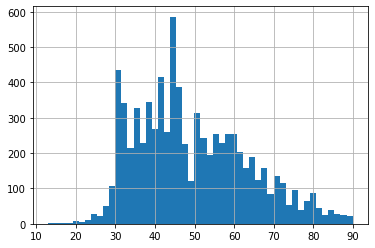

In [76]:
df['total_area'].hist(bins=50)

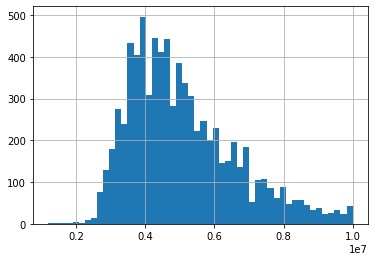

In [77]:
df['last_price'].hist(bins=50)

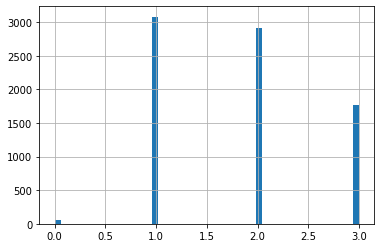

In [78]:
df['rooms'].hist(bins=50)

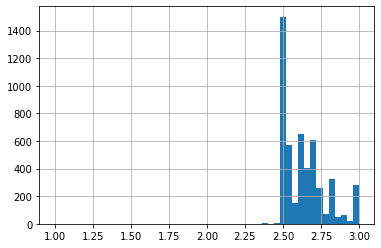

In [79]:
df['ceiling_height'].hist(bins=50)

Теперь изучим факторы, влияющие на стоимость квартиры. Построим диаграммы рассеяния:

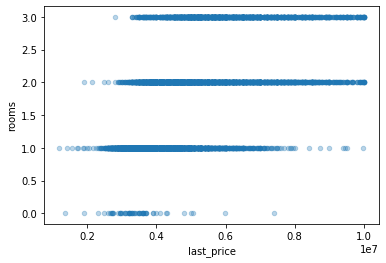

In [80]:
df.plot(x='last_price', y='rooms', kind='scatter', alpha=0.3)

In [82]:
# df.plot(x='last_price', y='floor_category', kind='scatter', alpha=0.3)

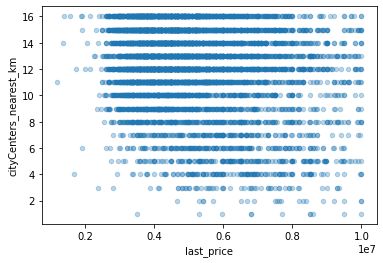

In [83]:
df.plot(x='last_price', y='cityCenters_nearest_km', kind='scatter', alpha=0.3)

In [85]:
# df.plot(x='last_price', y='first_day_exposition', kind='scatter', alpha=0.3)

Можно с уверенностью сказать, что корреляция зависимости цены и площади здесь значительно ярче, чем по всей выборке, так как здесь нет крупных, но недорогих квартир, располагающихся на окраине города или в области. Число объявлений на первом и последнем этажах визуально значительно меньше в процентном соотношении по сравнению с общей выборкой. Количество объявлений о продаже значительно выросло в 2017 г., а по всей выборке это наблюдалось уже с 2016 г.

## Общий вывод

Мы проанализировали базу данных сервиса Яндекc Недвижимость. Проведенный анализ позволяет сделать следующие выводы:

1) Цена квартиры сильнее всего коррелирует с общей площадью (0,65), количеством комнат (0,44), высотой потолка (0,31).

2) По годам был заметен рост количества дорогих квартир (что может быть связано с общим ростом цен на недвижимость), при этом в 2019 году их количество упало. По месяцам заметно ниже количество объявлений о продаже дорогих квартир летом и в декабре. Аналогичное снижение видно и с наступлением выходных дней недели.

3) Среди населенных пунктов с наибольшим количеством объявлений в базе, населённые пункты с низкой стоимостью жилья находятся в Выборге (2,8 млн руб.) , а с самой высокой - в Петербурге (около 5 млн руб.).

4) Граница центра Санкт-Петербурга проходит по 16 км включительно. Корреляция зависимости цены и площади здесь значительно ярче, чем по всей выборке (, так как здесь нет крупных, но недорогих квартир, располагающихся на окраине города или в области. Число объявлений на первом и последнем этажах значительно меньше в процентном соотношении по сравнению с общей выборкой.